# **Python: From Tools to Healthcare Applications**

*Week 2 (Part 2) - Numpy, Pandas & Matplotlib*
---
Compiled for SHP by Shubh & Pooja

---



# Numpy

We often want to work with arrays of numerical data, for example a list of firing rates. We can store such data using basic Python, more specifically as a list of numbers:

In [ ]:
lst_1 = [25, 20, 40, 5]

But these lists are missing a lot of functionality that we find useful for handling numerical data. (You may be used to these from Matlab or R.) For example, suppose you want to multiply each number by 2. We may want the following command to work:

In [ ]:
2*lst_1

[25, 20, 40, 5, 25, 20, 40, 5]

Yet its output is not what we are looking for. This is because lists are not *vectorized*: they do not assume that operations should be applied elementwise. Instead we would have to use a command like the one below:

In [ ]:
lst_2 = [lst_1[i]*2 for i in range(4)]
lst_2

[50, 40, 80, 10]

To address this and other issue that arise in handling numerical data in Python, we can use `numpy`, which stands for numerical data in Python.

So far, we have exclusively used Python's base functionality. `numpy` is the first example of a package that has been contributed by external users and has to be installed manually. It is, however, integral to Python for basically anyone working with numerical data.

In [ ]:
import numpy as np

## One-dimensional arrays: Vectors
The central object of interest for numpy is an *array*, which refers to rectangular data (more on this later). The simplest case of an array is a one-dimensional one, a vector. You can create a vector from a list:

In [ ]:
lst_1 = [25, 20, 40, 5]
vec_1 = np.array(lst_1)

In [ ]:
vec_1

array([25, 20, 40,  5])

In [ ]:
type(vec_1)

numpy.ndarray

We can also turn a vector back into a list:

In [ ]:
list(vec_1)

[25, 20, 40, 5]

Using the numpy array, we can now perform mathematical operations in the way we would like (and perhaps expect from e.g. Matlab).

In [ ]:
vec_2 = 2*vec_1
vec_2

array([50, 40, 80, 10])

In [ ]:
vec_1+vec_2

array([ 75,  60, 120,  15])

In contrast, what happens if we add two lists?

In [ ]:
lst_1 + lst_2

[25, 20, 40, 5, 50, 40, 80, 10]

### Differences between lists and vectors
Both lists and vectors can be indexed and we can easily transform an array into a list and vice versa. What are some of their differences?
#### Elementwise operations
We have already covered that arrays have elementwise operations whereas lists do not.
#### Each element must have the same type
Lists can consist of elements with different types:

In [ ]:
lst_3 = ['a', 5]
lst_3

['a', 5]

An array, on the other hand, will always have the same data type for each of its elements. If a list with unequal types is converted to an array all its elements are converted to the same data type.

In [ ]:
vec_3 = np.array(lst_3)
vec_3

array(['a', '5'], dtype='<U21')

<U21 is the data type corresponding to strings. You usually don't want to rely on this automatic casting functionality and should try to avoid it.

In [ ]:
type(vec_3)

numpy.ndarray

How can you print out the type of this vector? Note that `type(vec_3)` gives you the type of the entire object which is a numpy array. Rather you want the type of the individual elements. Try using the autocomplete function to find out.

*Hint* look at what the type information was called above.

In [ ]:
vec_3.dtype

dtype('<U21')

We do we not need parentheses after `dtype`? This is because `dtype` is not function, but rather a new type of Python object called an *attribute*. These are like variables, but are limited in scope to specific objects. We will get to know them in more depth in a later lesson.

### Question 1

- Create a numpy array with the elements 3, 7, 10 and divide each element by two
- Create a new array `vec_4` that is the elementwise multiplication of `vec_1` and `vec_2`.
- Create an array `vec_5` that has a `True` value wherever `vec_1` is smaller than or equal to `20` and a `False` value otherwise. *Hint:* This should be possible in a one liner.

In [ ]:
vec_q1 = np.array([3,7,10])
vec_q1/2

array([1.5, 3.5, 5. ])

In [ ]:
vec_4= vec_1*vec_2
vec_4

array([1250,  800, 3200,   50])

In [ ]:
vec_5 = vec_1 <= 20
vec_5

array([False,  True, False,  True])

## Two-dimensional arrays: Matrices
Rectangular data in two dimensions is often called a matrix: it consists of observations organized by rows and columns. Basic Python would allow us to store such data using a list of lists:

In [ ]:
lst_1 = [
    [1, 2],
    [3, 4],
    [5, 6]
]
lst_1

[[1, 2], [3, 4], [5, 6]]

Yet the already tedious process of computing elementwise operations quickly becomes infeasible in this context. If wanted to multiply each element by two we would have to iterate over the outer list and then the inner set of lists.

In [ ]:
lst_2 = [
    [2*it2 for it2 in it] for it in lst_1
]
lst_2

[[2, 4], [6, 8], [10, 12]]

Again we can turn the list of lists into a matrix simply by applying `np.array`:

In [ ]:
mat_1 = np.array(lst_1)
mat_1

array([[1, 2],
       [3, 4],
       [5, 6]])

Now we can apply vectorized operations as previously:

In [ ]:
mat_2 = 2*mat_1
mat_2

array([[ 2,  4],
       [ 6,  8],
       [10, 12]])

How can you find out the number of rows and columns of the matrix? Try googling or exploring the methods using the autocomplete function.

In [ ]:
mat_1.shape

(3, 2)

Importantly, numpy, by default, uses elementwise computations. So `*` results in elementwise multiplication, not matrix multiplication.

In [ ]:
mat_1*mat_2

array([[ 2,  8],
       [18, 32],
       [50, 72]])

You can run matrix multiplication by using the `@` operator.

In [ ]:
mat_3 = np.array([[1,2],[3,4]])
mat_1@mat_3

array([[ 7, 10],
       [15, 22],
       [23, 34]])

### Saving arrays
We can save arrays using `np.save`.

In [ ]:
np.save('mat_1.npy', mat_1)

In [ ]:
mat_1_copy = np.load('mat_1.npy')

In [ ]:
mat_1_copy

array([[1, 2],
       [3, 4],
       [5, 6]])

## Higher-dimensional arrays

We now load some simulated data, which is stored in the file `ex_array.npy`. Try assigning the data in that file to the variable `arr`.

In [ ]:
arr = np.load('/content/ex_array.npy')

Suppose you know that what is stored in this data are spike rates of fifty different neurons for two different conditions and ten repeated measurements. Spike rates are recorded every second for 2000 seconds. How can you figure out how this data is represented in the array?

In [ ]:
arr.shape

(2, 10, 50, 2000)

In [ ]:
arr.ndim

4

Whereas a vector has one dimension and a matrix has two dimensions, `arr` has four dimensions: the first one specifies the condition, the second one the trial, the third one the neuron, and the fourth one the timepoint. We can also create higher-dimensional arrays directly:

In [ ]:
arr_2 = np.array([
    [[2,4,6],
     [1,3,5]],
    [[0.5,1,2],
     [0.75, 1, 1.25]]
])

What is `arr_2.ndim` and `arr_2.shape`?

In [ ]:
arr_2.ndim

3

In [ ]:
arr_2.shape

(2, 2, 3)

### Data must be rectangular
Importantly numpy only allows for rectangular data. What happens if you create an array from a list of lists with unequal length?

In [ ]:
mat = np.array([[1,2],[3]])

<ipython-input-5-3935cbbd2b7c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mat = np.array([[1,2],[3]])


In [ ]:
mat

array([list([1, 2]), list([3])], dtype=object)

### Broadcasting

In general you cannot add two matrices with different shapes:

In [ ]:
mat_1.shape

(3, 2)

In [ ]:
mat_3 = np.array([
    [1,2,3],
    [1,2,3]
])

In [ ]:
mat_1+mat_3

ValueError: ignored

Elementwise operations can work between two arrays with unequal shapes:
- If they match everywhere except where one of them has a dimension of length 1
- If they have an unequal number of dimensions, the array with fewer dimensions is appended dimensions of length 1 in the beginning.

In [ ]:
np.array([
    [1,2]
]) + np.array([
    [1,2],
    [3,4],
    [5,6]
])

array([[2, 4],
       [4, 6],
       [6, 8]])

The same thing is true for matrices with one column or other elementwise operations.

In [ ]:
divisor = np.array([[2], [1], [1]])

In [ ]:
divisor.shape

(3, 1)

In [ ]:
mat_1

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
mat_1 / divisor

array([[0.5, 1. ],
       [3. , 4. ],
       [5. , 6. ]])

In [ ]:
vec_4 = np.array([1, 2])

In [ ]:
vec_4.shape

(2,)

In [ ]:
vec_4+mat_1

array([[2, 4],
       [4, 6],
       [6, 8]])

### Creating some arrays

In [ ]:
np.linspace(0, 1, 21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [ ]:
np.ones((4, 2, 3))

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

### Question 2

Below we're creating arrays with different shapes. Try predicting for each if elementwise addition would work, what shape the resulting array would have, then try it out and see if you were correct.

In [ ]:
arr_1 = np.ones((3,2))
arr_2 = np.ones((2,3))
print(arr_1)

[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [ ]:
arr_1 = np.ones((4,1,5))
arr_2 = np.ones((4,6,5))

In [ ]:
arr_1 = np.ones((4,1,5))
arr_2 = np.ones((4,6,1))

In [ ]:
arr_1 = np.ones((4,3,5))
arr_2 = np.ones((3,5))

In [ ]:
arr_1 = np.ones((4,3,5))
arr_2 = np.ones((4,3))

## Summary operations

Summary operations allow you to collapse an array according to a certain summary statistic. For instance, we may want to compute the overall mean firing rate in our experimental data:

In [ ]:
arr.mean()

0.8717270073789571

You can also specify the axis along we want to average. For instance, maybe we want to average firing rates across individual trials:

In [ ]:
arr.shape

(2, 10, 50, 2000)

In [ ]:
arr_across_trials = arr.mean(axis=1)

In [ ]:
arr_across_trials.shape

(2, 50, 2000)

The `keepdims` argument means that you don't remove the dimensions you're averaging over, but rather set their length to 1:

In [ ]:
arr_across_trials = arr.mean(axis=1, keepdims=True)

In [ ]:
arr_across_trials.shape

(2, 1, 50, 2000)

You can average across multiple axes as well. For instance, maybe you want to average across both trials and time:

In [ ]:
arr_across_trials_and_time = arr.mean(axis=(1,3))

In [ ]:
arr_across_trials_and_time.shape

(2, 50)

### Question 3

- What is the average firing rate across all neurons, times, and trials for each condition?
- (Advanced.) Subtract the average firing rate per time across all neurons, trials, and conditions from the original array.

In [ ]:
avg = arr.mean(axis = (1,2,3), keepdims = True)
avg.shape

(2, 1, 1, 1)

## Indexing

Indexing in vectors works just as in lists:

In [ ]:
vec_1

array([25, 20, 40,  5])

In [ ]:
vec_1[0]

25

For matrices and higher-dimensional arrays, a single index selects a single row:

In [ ]:
mat_1

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
mat_1[0]

array([1, 2])

In [ ]:
mat_1[0][1]

2

Instead of using two brackets, you can also separate the row and column index by a comma:

In [ ]:
# The following two lines of code are equivalent
print(mat_1[0][0])
print(mat_1[0,0])

1
1


### Slicing

Slicing is a useful way of extracting more than one element. In particular, `j:k` extracts the elements j,...,k-1:

In [ ]:
vec = np.arange(10)
print(vec)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
vec[3:7]

array([3, 4, 5, 6])

We can leave either end of the range away and it will default to the beginning and the end of the list, respectively.

In [ ]:
vec[:7]

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
vec[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [ ]:
vec[:] # What do you think this will do?

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can therefore also use the colon to select all rows of a matrix and specific columns.

In [ ]:
mat_1

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
mat_1[:,0]

array([1, 3, 5])

You can add another colon to specify a step size, similarly to how you would use these three arguments in `range`.

In [ ]:
vec[3:7:2]

array([3, 5])

We could still leave away the beginning or the end of the slice:

In [ ]:
vec[::2]

array([0, 2, 4, 6, 8])

### Question 4
Predict the output of the following commands:

In [ ]:
vec[:4]

array([0, 1, 2, 3])

In [ ]:
vec[5:9:2]

array([5, 7])

In [ ]:
vec[:7:2]

array([0, 2, 4, 6])

In [ ]:
vec[2::2]

array([2, 4, 6, 8])

### Boolean indexing

Do you remember how to create an array that is true if and only if `vec` is smaller than 5?

In [ ]:
vec = np.arange(10)
vec

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
selector = vec <= 5
selector

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False])

You can use these boolean arrays to subset the corresponding true values.

In [ ]:
vec

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
vec[selector]

array([0, 1, 2, 3, 4, 5])

In [ ]:
vec[vec<=5]

array([0, 1, 2, 3, 4, 5])

You can do the same with matrices:

In [ ]:
mat_1 = np.array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
mat_1 >= 3

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [ ]:
mat_1[mat_1 >= 3]

array([3, 4, 5, 6])

### Questions 5
- Consider the example matrix from above and subset all entries with values between 2 and 4. You can try to do this in one line or do it through multipel lines!

In [ ]:
mat_1 [(mat_1 < 4) & (mat_1 > 2)]  #go over this

TypeError: ignored

In [ ]:
# Good coding convention: Move all imports to the top of your notebook/file
import pandas as pd
import numpy as np # We will also be needing numpy as pandas is tightly integrated with numpy

# Pandas and Data Visualization
## Pandas
### Motivation for pandas
Dictionaries allow us to save multiple attributes of a particular object. For example, we can store some information about a lesson:

In [ ]:
lesson_5 = {
    'topic': 'Numpy',
    'teacher': 'Sam',
    'week': 5
}

Often, we collect multiple observations for which we record the same attributes and we'd like to store them together:

In [ ]:
lesson_3 = {
    'topic': 'Basics of Python 2',
    'teacher': 'Jasmine',
    'week': 3
}
lesson_1 = {
    'topic': 'Setting up Python',
    'teacher': 'Jasmine',
    'week': 1
}

We could go about this by storing them in a list:

In [ ]:
lst_lessons = [lesson_5, lesson_3, lesson_1]

In [ ]:
lst_lessons

[{'topic': 'Numpy', 'teacher': 'Sam', 'week': 5},
 {'topic': 'Basics of Python 2', 'teacher': 'Jasmine', 'week': 3},
 {'topic': 'Setting up Python', 'teacher': 'Jasmine', 'week': 1}]

However, such lists are lacking a lot of functionality. For example, we may want to print out only those observations where Jasmine was the teacher. We'd have to use a for loop for this:

In [ ]:
jasmines_lessons = [
    lesson for lesson in lst_lessons if lesson['teacher'] == 'Jasmine'
]
jasmines_lessons

[{'topic': 'Basics of Python 2', 'teacher': 'Jasmine', 'week': 3},
 {'topic': 'Setting up Python', 'teacher': 'Jasmine', 'week': 1}]

We therefore need a new data structure that can record multiple pieces of information about multiple observations. This is provided by `pandas` (which stands for *panel data*):

The core object in pandas is a *data frame*, which consists of observations organized along its rows and different pieces of information about its observations organized along its columns.

In [ ]:
df_lessons = pd.DataFrame(lst_lessons)
df_lessons

,topic,teacher,week
0,Numpy,Sam,5
1,Basics of Python 2,Jasmine,3
2,Setting up Python,Jasmine,1


### Finding out basic information

In [ ]:
df_lessons.shape

(3, 3)

In [ ]:
df_lessons.columns

Index(['topic', 'teacher', 'week'], dtype='object')

### Indexing

Regular brackets return a specific column or a subset of columns:

In [ ]:
df_lessons['teacher']

0        Sam
1    Jasmine
2    Jasmine
Name: teacher, dtype: object

(*Note:* The object that is returned is called a `pd.Series` and has a few additional features compared to a one-dimensional numpy array. I personally don't use those additional features and think they are counter-productive, but you can look them up if you have to interact with them.)

You can operate on those columns in the same way you would operate on numpy arrays:

In [ ]:
df_lessons['teacher'] == 'Jasmine'

0    False
1     True
2     True
Name: teacher, dtype: bool

In [ ]:
df_lessons[['topic', 'teacher']]

,topic,teacher
0,Numpy,Sam
1,Basics of Python 2,Jasmine
2,Setting up Python,Jasmine


`.loc` allows you to index data frames by row numbers and column names:

In [ ]:
df_lessons.loc[1, 'teacher']

'Jasmine'

This also works with slicing:

In [ ]:
df_lessons.loc[1:, 'teacher']

1    Jasmine
2    Jasmine
Name: teacher, dtype: object

In [ ]:
df_lessons.loc[:, ['topic', 'teacher']]

,topic,teacher
0,Numpy,Sam
1,Basics of Python 2,Jasmine
2,Setting up Python,Jasmine


`iloc` works in the same way, but allows you to access columns according to their numerical index rather than their name:

In [ ]:
df_lessons.iloc[1, 1]

'Jasmine'

Finally you can also do boolean indexing with rectangular brackets.

In [ ]:
selector = df_lessons['teacher'] == 'Jasmine'
df_lessons[selector]

,topic,teacher,week
1,Basics of Python 2,Jasmine,3
2,Setting up Python,Jasmine,1


(Note that the single `=` assigns the command to the right of it to the variable on its left. The double `==` on the other hand compares the values in `df_lessons['teacher']` and determines whether they are equal to `'Jasmine'`.)

In [ ]:
df_lessons[df_lessons['teacher']=='Jasmine']

,topic,teacher,week
1,Basics of Python 2,Jasmine,3
2,Setting up Python,Jasmine,1


Finally, you can add new columns in the same way you would add a new key, value pair to a dictionary:

In [ ]:
df_lessons

,topic,teacher,week
0,Numpy,Sam,5
1,Basics of Python 2,Jasmine,3
2,Setting up Python,Jasmine,1


In [ ]:
df_lessons['homework'] = [True, False, True]

In [ ]:
df_lessons

,topic,teacher,week,homework
0,Numpy,Sam,5,True
1,Basics of Python 2,Jasmine,3,False
2,Setting up Python,Jasmine,1,True


### Exercises
1. Create a data frame that additionally includes this week (week 6) with the appropriate topic (pandas) and teacher (Sam).
2. Print out the topic for the second row.
3. Subset the data frame to only print out the lessons for week 3 and higher.
4. Create a new data frame that also includes week 7's lesson with teacher Abhi. However, you don't know the topic yet. How does `pandas` represent this information? (Hint: Create a dictionary that only contains the keys `week` and `teacher`, but not `topic`. Try adding it to the list we used above and turning it into a dataframe.)
5. You could have alternately also represented this information as a two-dimensional array with observations structured along rows and variables structured along columns. What would the difference be and why might this be a bad idea in this case? Discuss with the other students at your table.

In [ ]:
data = {"topic"  : [ "Numpy", 'pandas', "matplotlib"],
         'teacher': ['shubh', 'pooja', 'pooja'],
         'week':[5,4,3]}
df_lessons= pd.DataFrame(data)

#2.
df_lessons.loc[1, 'topic']



'pandas'

### Saving and loading a data frame
You can save data frames in different formats. A popular format is csv (comma-separated values), which represents each observation in one row and each variable separated by commas.

In [ ]:
df_lessons.to_csv('df_lessons.csv')

Let's inspect this file.

We'll be using csv files today. Note that they are not always ideal. For example, they do not save the type of your different values which can lead to issues. In my own work, I usually use the feather format, which is less commonplace, however. (Sam said this, I use hdf5s which can make me quite annoyed at times)

In [ ]:
df_lessons_loaded = pd.read_csv('df_lessons.csv')

In [ ]:
df_lessons_loaded

,Unnamed: 0,topic,teacher,week
0,0,Numpy,shubh,5
1,1,pandas,pooja,4
2,2,matplotlib,pooja,3


### Exercises
1. Read in the file `dot_motion.csv` using pandas and assign it to the variable `df_dm`.
2. Try exploring the file and describe the data contained in it.
3. Subset the data frame to only contain the observations with a reaction time of above 100.
4. Create a new variable 'accuracy' that is 1 if the motion and the choice are matching and 0 otherwise.

#### Hint for 4:
If the motion and choice are matching, their entries should be equal. Create an array `accuracy` that contains as a boolean whether they are or are not matching. You can turn this boolean array (with True and False value) into a float array (which will assign 1 to True and 0 to False), using `accuracy.astype(float)`.


In [ ]:
df_dm = pd.read_csv('/content/dot_motion.csv')
df_dm
#3.
df_dm['reaction_time'] > 100
#4.
accuracy = (df_dm['motion'] == df_dm['choice'])
print(accuracy)

0      False
1       True
2       True
3      False
4       True
       ...  
495     True
496     True
497     True
498     True
499     True
Length: 500, dtype: bool


### Group by
With data frames we can compute summary statistics. For these summary satistics, we might want to group observations together if they have the same value in certain columns. We can do this using `groupby`.

In [ ]:
grouped_by_subject = df_dm.groupby(['subject'])
print(grouped_by_subject)

By default, we don't really see this object. But we can inspect the groups:

In [ ]:
grouped_by_subject.groups

We can also get each individual group:

In [ ]:
grouped_by_subject.get_group('Subject 1')

The 'Unnamed: 0' column here is an artifact of how pandas treats row names. Here our row names (which are simply the list from 0-199) were turned into a column that did not have a name. If this happens, I recommend ignoring or removing those columns.

Because we only want to compute the mean for the reaction time and accuracy, we subset these two columns. We can do this as with a normal data frame.

In [ ]:
grouped_by_subject_subset = grouped_by_subject[['reaction_time', 'accuracy']]
grouped_by_subject_subset

In [ ]:
grouped_by_subject_subset.get_group('Subject 1') # We have removed the other columns

We can now apply the function `mean`, to summarise each group:

In [ ]:
mean_reaction_time = grouped_by_subject_subset.mean()
mean_reaction_time

By default, the variables according to which the data frame is being grouped are not columns anymore but rather a property called row names. I dislike rownames and try to avoid them in my own work. You can turn them back into a column using the method `reset_index`.

In [ ]:
mean_reaction_time_df = mean_reaction_time.reset_index()
mean_reaction_time_df

Taken together, here is what we did:

In [ ]:
mean_reaction_time_df = df_dm.groupby(['subject'])\
                              [['reaction_time', 'accuracy']]\
                             .mean()\
                             .reset_index()
mean_reaction_time_df

`\` allows you to break a line without this changing your code. The above would be equivalent to one long line as below:

In [ ]:
mean_reaction_time_df = df_dm.groupby(['subject'])[['reaction_time', 'accuracy']].mean().reset_index()
mean_reaction_time_df

Breaking lines often makes your code more easily understandable.

A couple of aggregate functions are implemented as methods, for example `mean`, `max`, and `min`. You can also supply your own function by using the `apply` method. For example, the following command is equivalent to what we computed above:

In [ ]:
mean_reaction_time_df = df_dm.groupby(['subject'])\
                              [['reaction_time', 'accuracy']]\
                             .apply(np.mean)\
                             .reset_index()
mean_reaction_time_df

Below, we instead compute the 75-th quantile:

In [ ]:
def quantile_75(x):
  return x.quantile(.75)

In [ ]:
rt_75 = df_dm.groupby(['subject'])\
              [['reaction_time']]\
              .apply(quantile_75)\
              .reset_index()
rt_75

## Exercises
1. Compute the maximal reaction time grouped according to subject and noise level.
2. Define a function computing the interquartile range. The interquartile range is defined as the difference between the .75-quantile and the .25-quantile.
3. Use this function to compute the interquartile range for each subject and noise level.

In [ ]:
#come back to

## Data visualization

## Matplotlib

Matplotlib provides some basic plotting functionality including lineplots, scatterplots, and barplots. In order to use it with some of the data we've been messing around with, we'll need to manipulate the data a little bit. We'll go over this in more detail next class!

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
populations

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,AFG,8996973,9169410,9351441,9543205,9744781,9956320,10174836,10399926,...,28394813,29185507,30117413,31161376,32269589,33370794,34413603,35383128,36296400,37172386
1,Albania,ALB,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,...,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376
2,Algeria,DZA,11057863,11336339,11619828,11912803,12221675,12550885,12902627,13275026,...,35333881,35977455,36661444,37383887,38140132,38923687,39728025,40551404,41389198,42228429
3,American Samoa,ASM,20123,20602,21253,22034,22854,23672,24462,25248,...,56683,56079,55759,55667,55713,55791,55812,55741,55620,55465
4,Andorra,AND,13411,14375,15370,16412,17469,18549,19647,20758,...,84463,84449,83747,82427,80774,79213,78011,77297,77001,77006
5,Angola,AGO,5454933,5531472,5608539,5679458,5735044,5770570,5781214,5774243,...,22514281,23356246,24220661,25107931,26015780,26941779,27884381,28842484,29816748,30809762
6,Antigua and Barbuda,ATG,54131,55001,55841,56702,57641,58698,59915,61241,...,86746,88028,89253,90409,91516,92562,93566,94527,95426,96286
7,Argentina,ARG,20481779,20817266,21153052,21488912,21824425,22159650,22494035,22828869,...,40482788,40788453,41261490,41733271,42202935,42669500,43131966,43590368,44044811,44494502
8,Armenia,ARM,1874121,1941492,2009526,2077578,2145001,2211319,2276034,2339127,...,2888092,2877319,2876538,2884229,2897584,2912403,2925553,2936146,2944809,2951776
9,Aruba,ABW,54211,55438,56225,56695,57032,57360,57715,58055,...,101455,101669,102046,102560,103159,103774,104341,104872,105366,105845


In [ ]:
populations = pd.read_csv('/content/populations.csv')
populations = populations.drop('Unnamed: 0', axis=1)
tidied_populations = populations.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='population')

In [ ]:
# Create a data frame that only contains the population for Canada
arg_population = tidied_populations[tidied_populations['Country Name'] == 'Argentina']


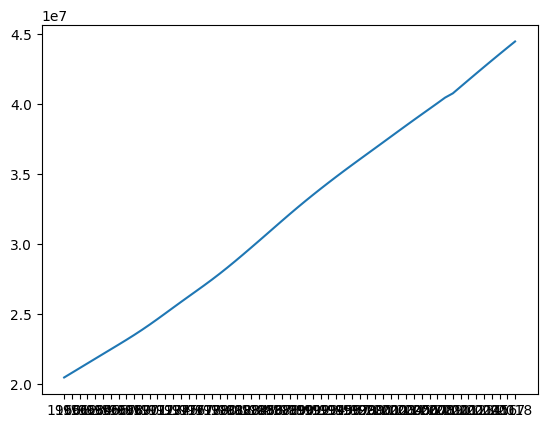

In [ ]:
plt.plot(arg_population['Year'], arg_population['population'])

### Exercise
1. Create a data frame that contains the average of the selected countries for each year.
2. Plot this average as a lineplot over the years.

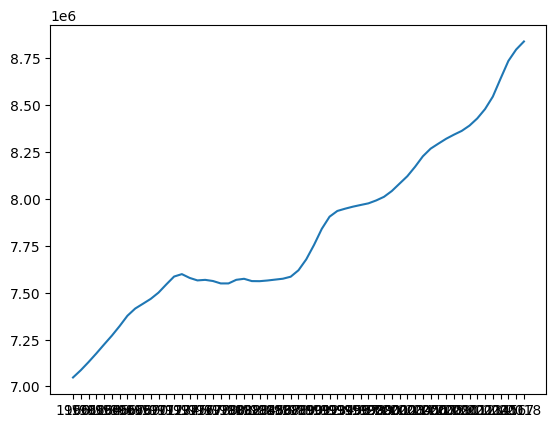

In [ ]:
new_population = tidied_populations[tidied_populations['Country Name'] == 'Austria']
plt.plot(new_population['Year'], new_population['population'])

## A taste of what's coming up next week!

<Axes: xlabel='Year', ylabel='population'>

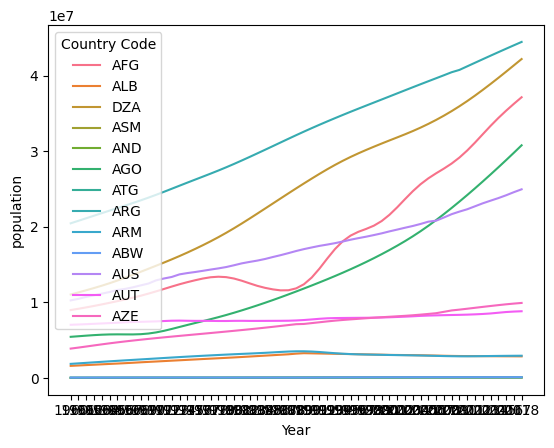

In [ ]:
import seaborn as sns
sns.lineplot(data=tidied_populations, x='Year', y='population', hue = 'Country Code')